# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./(EDITED)KMeans_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

## DataFrame Preview

In [2]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
malicious_df

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,0,490d584c7d303ed35c673460b63f3ca8,trojan,dropper,pua,"GetSystemTimeAsFileTime,NtCreateMutant,GetSyst..."
1,0,9ab8ea1d2d68a0d4110df413e677976c,trojan,hacktool,_,"GetSystemTimeAsFileTime,NtCreateMutant,GetSyst..."
2,0,adbc74815ef2bd1ea4967abad812233d,trojan,_,_,"GetSystemTimeAsFileTime,NtCreateMutant,GetSyst..."
3,0,f6eb4841bba3a4cee747700dc0ee1609,_,_,_,"GetSystemTimeAsFileTime,NtCreateMutant,GetSyst..."
4,0,f5a0ad49337ebc87897698e70d03364e,trojan,dropper,_,"GetSystemTimeAsFileTime,NtCreateMutant,GetSyst..."
...,...,...,...,...,...,...
1756,198,d24b78bd73f17379ed62e4c776b4f66e,trojan,adware,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
1757,198,f666dd4b3a53b7fe71f8976fa09bfdfb,trojan,adware,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
1758,199,b6d6520b608875282d831b1e983cd5e5,_,_,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."
1759,199,18bce1a594550daf8b3f318de48c1674,trojan,dropper,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr..."


In [3]:
def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

#Inject pattern (i.e., summarized API Call Pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)
#Drop row that is falsely labelled. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')&(malicious_df['Type 2']=='_')&(malicious_df['Type 3']=='_')].index, inplace=True)
display(malicious_df)

,cluster,hash,Type 1,Type 2,Type 3,pattern,type_pattern
0,0,490d584c7d303ed35c673460b63f3ca8,trojan,dropper,pua,"GetSystemTimeAsFileTime,NtCreateMutant,GetSyst...",trojan dropper pua
1,0,9ab8ea1d2d68a0d4110df413e677976c,trojan,hacktool,_,"GetSystemTimeAsFileTime,NtCreateMutant,GetSyst...",trojan hacktool _
2,0,adbc74815ef2bd1ea4967abad812233d,trojan,_,_,"GetSystemTimeAsFileTime,NtCreateMutant,GetSyst...",trojan _ _
4,0,f5a0ad49337ebc87897698e70d03364e,trojan,dropper,_,"GetSystemTimeAsFileTime,NtCreateMutant,GetSyst...",trojan dropper _
5,0,4c972b447659f1e86769eb43593fd2a5,trojan,downloader,dropper,"GetSystemTimeAsFileTime,NtCreateMutant,GetSyst...",trojan downloader dropper
...,...,...,...,...,...,...,...
1755,198,0226e311ed2648ff399c7902fc113421,adware,trojan,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",adware trojan _
1756,198,d24b78bd73f17379ed62e4c776b4f66e,trojan,adware,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan adware _
1757,198,f666dd4b3a53b7fe71f8976fa09bfdfb,trojan,adware,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",trojan adware _
1759,199,18bce1a594550daf8b3f318de48c1674,trojan,dropper,_,"SetErrorMode,OleInitialize,LdrGetDllHandle,Ldr...",trojan dropper _


## "What Malware Types can be found in the dataset?"

How many instances of a certain malware type are there in the entire dataset per Type # (indicating popularity) as specified by VirusTotal (VT)?

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [4]:
str_output = ""
str_output += str(malicious_df['Type 1'].value_counts()) + "\n\n"
# str_output += str(malicious_df['Type 2'].value_counts()) + "\n\n"
# str_output += str(malicious_df['Type 3'].value_counts()) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

Type 1
trojan        1340
adware         195
downloader      78
ransomware      19
miner           14
dropper          4
pua              3
virus            1
hacktool         1
Name: count, dtype: int64




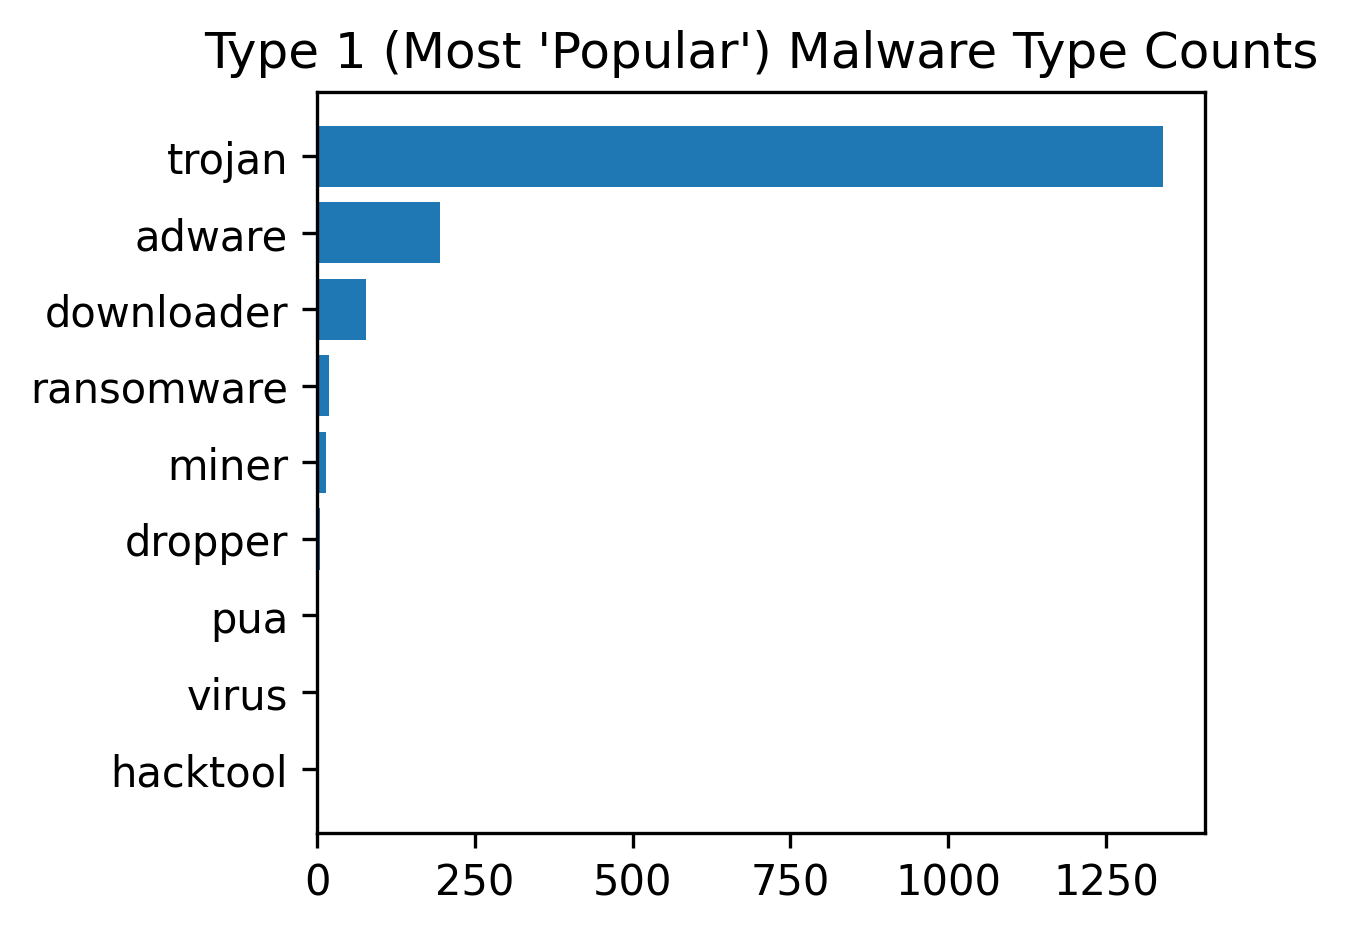

In [5]:
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Type 1 (Most \'Popular\') Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## "What Malware Types are there in each cluster?"

This indicates what are the individual malware types mostly associated to cluster in terms of quantity regardless of order by popularity by VT.

Note that order matters as the first ones are the most popular labels as indicated by VT.

In [6]:
#Identify the overall list of types each cluster is as designated by VirusTotal.
unique_clusters = get_unique_clusters(malicious_df)

summary = []

for u in unique_clusters:
    cluster_sublist = [u]
    df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
    idx = list(df_copy['Type 1'].value_counts().index)
    counts = list(df_copy['Type 1'].value_counts())
    type_sublist = []
    for i in range(len(idx)):
        type_sublist.append([idx[i], counts[i]])
    cluster_sublist.append(type_sublist)
    # str_summary = []
    # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
    # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
    summary.append(cluster_sublist)

### Identify the counts of Malware Types per Cluster (by Type #)

This indicates the malware types (including the # of instances) found in each cluster.

In [7]:
str_output = ""
for s in summary:
    str_output += f"CLUSTER: {s[0]}\n"
    str_output += "\tType 1: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n======================================================================\n"
with open("./Output/1 MalwareType_per_Cluster.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER: 0
	Type 1: trojan (9); 
CLUSTER: 1
	Type 1: trojan (5); 
CLUSTER: 2
	Type 1: trojan (10); 
CLUSTER: 3
	Type 1: downloader (4); trojan (3); adware (2); 
CLUSTER: 4
	Type 1: trojan (9); downloader (1); 
CLUSTER: 5
	Type 1: trojan (10); 
CLUSTER: 6
	Type 1: downloader (6); adware (3); trojan (1); 
CLUSTER: 7
	Type 1: trojan (10); 
CLUSTER: 8
	Type 1: trojan (10); 
CLUSTER: 9
	Type 1: trojan (10); 
CLUSTER: 10
	Type 1: trojan (10); 
CLUSTER: 11
	Type 1: trojan (2); 
CLUSTER: 12
	Type 1: trojan (9); adware (1); 
CLUSTER: 13
	Type 1: adware (8); trojan (1); 
CLUSTER: 14
	Type 1: trojan (2); adware (1); 
CLUSTER: 15
	Type 1: trojan (10); 
CLUSTER: 16
	Type 1: miner (6); trojan (3); 
CLUSTER: 17
	Type 1: trojan (10); 
CLUSTER: 18
	Type 1: adware (5); trojan (5); 
CLUSTER: 19
	Type 1: trojan (6); adware (1); 
CLUSTER: 20
	Type 1: adware (8); trojan (2); 
CLUSTER: 21
	Type 1: trojan (10); 
CLUSTER: 22
	Type 1: trojan (10); 
CLUSTER: 23
	Type 1: trojan (10); 
CLUSTER: 24
	Type 1: trojan 

### Identify the Clusters that have the same Unique Malware Type Combinations

This indicates what clusters have verified malicious samples that match specific Malware Type Combinations.

This indicates the most occuring Malware Type Combination which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [8]:
str_output = ""

# Summarize Clusters that have the same malware types as per VirusTotal.
unique_type_summary = list(malicious_df['type_pattern'].unique())
str_output += f"# of Unique Malware Type Combinations: {len(unique_type_summary)}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type Combination: {u}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType_Combination.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)


count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type Combination', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type Combination (by Cluster Count)")
display(count_summary[['Malware Type Combination','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type Combination','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_Combination_byClusterCount.csv", index=False)

count_summary.sort_values(by='No. of Matching Clusters',ascending=True, inplace=True)
display("Top 10 Least Common Malware Types Combination (by Cluster Count)")
display(count_summary[['Malware Type Combination','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type Combination','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Least_Common_MalwareType_Combination_byClusterCount.csv", index=False)

# of Unique Malware Type Combinations: 75

UNIQUE MALWARE TYPE: 1
Malware Type Combination: trojan
Matching Clusters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
Matching Clusters Count: 184

UNIQUE MALWARE TYPE: 2
Malware Type 

'Top 10 Most Common Malware Type Combination (by Cluster Count)'

,Malware Type Combination,No. of Matching Clusters,Matching Clusters
8,trojan,184,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
7,adware,55,"[3, 6, 12, 13, 14, 18, 19, 20, 24, 29, 34, 35,..."
6,downloader,17,"[3, 4, 6, 33, 37, 44, 66, 76, 90, 98, 105, 127..."
2,pua,3,"[30, 60, 126]"
4,miner,2,"[16, 134]"
5,ransomware,2,"[78, 104]"
0,virus,1,[34]
1,hacktool,1,[69]
3,dropper,1,[80]


'Top 10 Least Common Malware Types Combination (by Cluster Count)'

,Malware Type Combination,No. of Matching Clusters,Matching Clusters
0,virus,1,[34]
1,hacktool,1,[69]
3,dropper,1,[80]
4,miner,2,"[16, 134]"
5,ransomware,2,"[78, 104]"
2,pua,3,"[30, 60, 126]"
6,downloader,17,"[3, 4, 6, 33, 37, 44, 66, 76, 90, 98, 105, 127..."
7,adware,55,"[3, 6, 12, 13, 14, 18, 19, 20, 24, 29, 34, 35,..."
8,trojan,184,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
